# Inception Models

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers as tkl
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [3]:
X_train = X_train / 255
X_test = X_test / 255

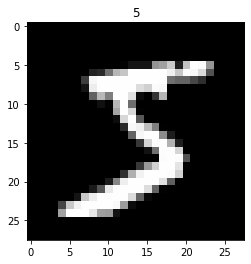

In [4]:
plt.imshow(X_train[0], cmap = "Greys_r")
plt.title(classes[y_train[0]])
plt.show()

### 1. Inception Network v1

In [5]:
def inception_module(X, x1, x3_reduce, x3, x5_reduce, x5, pool_proj, name = None, initializer = "he_normal"):
    conv2d_1x1 = tkl.Conv2D(x1, kernel_size = (1, 1), strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = initializer, bias_initializer = initializer)(X)
    
    conv2d_3x3_reduce = tkl.Conv2D(x3_reduce, kernel_size = (1, 1), strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = initializer, bias_initializer = initializer)(X)
    conv2d_3x3 = tkl.Conv2D(x3, kernel_size = (3, 3), strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = initializer, bias_initializer = initializer)(conv2d_3x3_reduce)
    
    conv2d_5x5_reduce = tkl.Conv2D(x5_reduce, kernel_size = (1, 1), strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = initializer, bias_initializer = initializer)(X)
    conv2d_5x5 = tkl.Conv2D(x5, kernel_size = (1, 1), strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = initializer, bias_initializer = initializer)(conv2d_5x5_reduce)
    
    maxpool2d = tkl.MaxPool2D(pool_size = (3, 3), strides = (1, 1), padding = "same")(X)
    pool_proj = tkl.Conv2D(pool_proj, kernel_size = (1, 1), strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = initializer, bias_initializer = initializer)(maxpool2d)
    
    output = tkl.Concatenate(axis = 3, name = name)([conv2d_1x1, conv2d_3x3, conv2d_5x5, pool_proj])
    return output

In [17]:
def inception_v1(initializer = "he_normal"):
    input_layer = keras.Input(shape = (28, 28, 1), name = "input_1")
    
    A1 = tkl.Conv2D(64, kernel_size = (7, 7), strides = (2, 2), padding = "same", activation = "relu", name = "conv_1", kernel_initializer = initializer, bias_initializer = initializer)(input_layer)
    P1 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_1")(A1)
        
    I1 = inception_module(P1, 64, 96, 128, 16, 32, 32, "inception_3a", initializer = initializer)
    I2 = inception_module(I1, 128, 128, 192, 32, 96, 64, "inception_3b", initializer = initializer)
    
    P5 = tkl.GlobalAveragePooling2D(name = "pool_5")(I2)
    
    D1 = tkl.Dropout(0.4)(P5)
    F1 = tkl.Flatten()(D1)
    L1 = tkl.Dense(1000, activation = "relu", name = "linear_1", kernel_initializer = initializer, bias_initializer = initializer)(F1)
    output = tkl.Dense(10, activation = "softmax", name = "output", kernel_initializer = initializer, bias_initializer = initializer)(L1)
    
    model = keras.Model(input_layer, output, name = "InceptionV1")
    model.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(),
        optimizer = keras.optimizers.Adam(),
        metrics = ["accuracy"]
    )
    return model
    

In [18]:
inception_model_v1 = inception_v1()

In [19]:
history = inception_model_v1.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 25)

Epoch 1/25


2022-10-21 15:57:26.886274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - ETA: 0s - loss: 0.2640 - accuracy: 0.9123

2022-10-21 15:58:02.450562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 39s 18ms/step - loss: 0.2640 - accuracy: 0.9123 - val_loss: 0.0594 - val_accuracy: 0.9813
Epoch 2/25
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0718 - accuracy: 0.9785 - val_loss: 0.0504 - val_accuracy: 0.9834
Epoch 3/25
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0536 - accuracy: 0.9837 - val_loss: 0.0527 - val_accuracy: 0.9821
Epoch 4/25
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0429 - accuracy: 0.9871 - val_loss: 0.0436 - val_accuracy: 0.9889
Epoch 5/25
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0352 - accuracy: 0.9892 - val_loss: 0.0342 - val_accuracy: 0.9892
Epoch 6/25
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0312 - accuracy: 0.9904 - val_loss: 0.0386 - val_accuracy: 0.9894
Epoch 7/25
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0283 - accuracy: 0.9913 - val_loss: 0.0325 - val_accura

In [20]:
pred = inception_model_v1.predict(X_test)

  1/313 [..............................] - ETA: 1:21

2022-10-21 16:12:12.820760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step


In [21]:
confusion_matrix = tf.math.confusion_matrix(y_test, np.argmax(pred, axis = 1), 10)

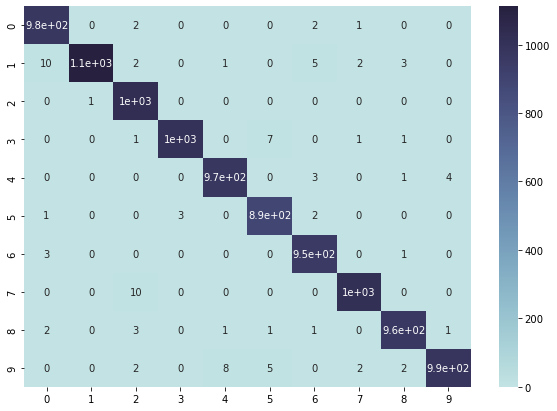

In [29]:
df_cm = pd.DataFrame(confusion_matrix, index = classes, columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=sn.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.show()

### 2. Inception Network v2 - Transfer Learning

In [47]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

reshaped_X_train = list()
reshaped_X_test = list()

for image in range(len(X_train)):
    im = Image.fromarray(X_train[image])
    im = im.resize((96, 96))
    im = im.convert("RGB")
    reshaped_X_train.append(np.array(im))
    print("{}/{}".format(image + 1, len(X_train)), end = "\r")
reshaped_X_train = np.array(reshaped_X_train)
print("\033[92m'TRAIN' dataset reshaped.")

for image in range(len(X_test)):
    im = Image.fromarray(X_test[image])
    im = im.resize((96, 96))
    im = im.convert("RGB")
    reshaped_X_test.append(np.array(im))
    print("{}/{}".format(image + 1, len(X_test)), end = "\r")
reshaped_X_test = np.array(reshaped_X_test)
print("\033[92m'TEST' dataset reshaped.")

'TRAIN' dataset reshaped.
'TEST' dataset reshaped.


In [49]:
base_model = keras.applications.inception_v3.InceptionV3(include_top = False, input_shape = (96, 96, 3))

In [50]:
v2_A1 = tkl.Conv2D(512, kernel_size = (1, 1), strides = (1, 1), padding = "same", activation = "relu")(base_model.output)
v2_D1 = tkl.Dense(512, activation = "relu", name = "dense_1")(v2_A1)
v2_output = tkl.Dense(10, activation = "softmax", name = "output")(v2_D1)

In [51]:
inception_model_v2 = keras.Model(base_model.input, v2_output, name = "InceptionV2")

In [52]:
inception_model_v2.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "rmsprop",
    metrics = ["accuracy"]
)

In [53]:
inception_model_v2.fit(reshaped_X_train, y_train, validation_data = (reshaped_X_test, y_test), epochs = 3)

Epoch 1/3


2022-10-21 16:20:54.701121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - ETA: 0s - loss: 0.3072 - accuracy: 0.1237

2022-10-21 16:27:43.330897: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 430s 213ms/step - loss: 0.3072 - accuracy: 0.1237 - val_loss: 22.0132 - val_accuracy: 0.1193
Epoch 2/3
1875/1875 [==============================] - 432s 230ms/step - loss: 0.1557 - accuracy: 0.1260 - val_loss: 0.0681 - val_accuracy: 0.1230
Epoch 3/3
1875/1875 [==============================] - 459s 245ms/step - loss: 0.1243 - accuracy: 0.1269 - val_loss: 0.0513 - val_accuracy: 0.1230


In [66]:
predictions = inception_model_v2.predict(reshaped_X_test)

313/313 [==============================] - 11s 35ms/step


In [71]:
np.count_nonzero(np.argmax(predictions, axis = 3).flatten() == y_test) / len(y_test)

0.9879

In [68]:
confusion_matrix = tf.math.confusion_matrix(y_test, np.argmax(predictions, axis = 3).flatten(), 10)

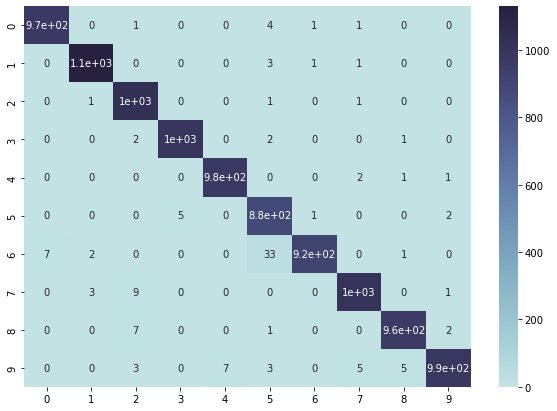

In [69]:
df_cm = pd.DataFrame(confusion_matrix, index = classes, columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=sn.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.show()

### Inception Network v3  - Random

In [72]:
random = np.random.randint(10, size = 10000)

In [73]:
print("Random Accuracy =", np.count_nonzero(random == y_test) / 10000)

Random Accuracy = 0.1062


In [74]:
confusion_matrix = tf.math.confusion_matrix(y_test, random, 10)

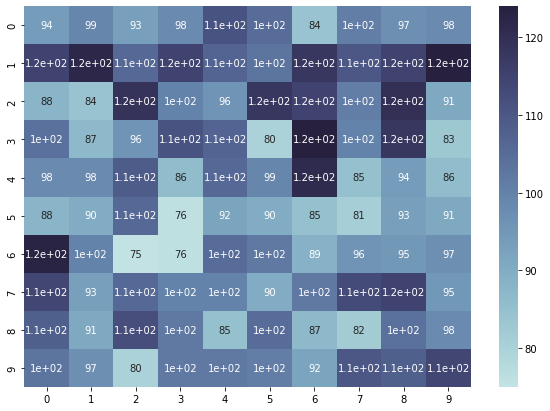

In [75]:
df_cm = pd.DataFrame(confusion_matrix, index = classes, columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=sn.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.show()

### Inception Network v4 - 4

In [22]:
def inception_v4(initializer = "he_normal"):
    input_layer = keras.Input(shape = (28, 28, 1), name = "input_1")
    
    A1 = tkl.Conv2D(64, kernel_size = (7, 7), strides = (2, 2), padding = "same", activation = "relu", name = "conv_1", kernel_initializer = initializer, bias_initializer = initializer)(input_layer)
    P1 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_1")(A1)
        
    I1 = inception_module(P1, 64, 96, 128, 16, 32, 32, "inception_3a", initializer = initializer)
    I2 = inception_module(I1, 128, 128, 192, 32, 96, 64, "inception_3b", initializer = initializer)
    
    P2 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_2")(I2)
    
    I3 = inception_module(P2, 192, 96, 208, 16, 48, 64, "inception_4a", initializer = initializer)
    I4 = inception_module(I3, 160, 112, 224, 24, 64, 64, "inception_4b", initializer = initializer)
    
    P3 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_3")(I4)
    
    P5 = tkl.GlobalAveragePooling2D(name = "pool_5")(P3)
    
    D1 = tkl.Dropout(0.4)(P5)
    F1 = tkl.Flatten()(D1)
    L1 = tkl.Dense(512, activation = "relu", name = "linear_1", kernel_initializer = initializer, bias_initializer = initializer)(F1)
    output = tkl.Dense(10, activation = "softmax", name = "output", kernel_initializer = initializer, bias_initializer = initializer)(L1)
    
    model = keras.Model(input_layer, output, name = "InceptionV1")
    model.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(),
        optimizer = keras.optimizers.Adam(),
        metrics = ["accuracy"]
    )
    return model

In [23]:
inception_model_v4 = inception_v4()

In [24]:
history_v4 = inception_model_v4.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50)

Epoch 1/50


2022-10-21 16:55:31.913045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1874/1875 [============================>.] - ETA: 0s - loss: 0.2322 - accuracy: 0.9272

2022-10-21 16:56:25.806076: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 59s 30ms/step - loss: 0.2322 - accuracy: 0.9273 - val_loss: 0.0696 - val_accuracy: 0.9789
Epoch 2/50
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0686 - accuracy: 0.9803 - val_loss: 0.0602 - val_accuracy: 0.9814
Epoch 3/50
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0543 - accuracy: 0.9847 - val_loss: 0.0558 - val_accuracy: 0.9849
Epoch 4/50
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0436 - accuracy: 0.9876 - val_loss: 0.0425 - val_accuracy: 0.9895
Epoch 5/50
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0421 - accuracy: 0.9883 - val_loss: 0.0412 - val_accuracy: 0.9899
Epoch 6/50
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0370 - accuracy: 0.9899 - val_loss: 0.0580 - val_accuracy: 0.9842
Epoch 7/50
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0327 - accuracy: 0.9909 - val_loss: 0.0347 - val_accura

In [25]:
predictions = inception_model_v4.predict(X_test)

2022-10-21 17:36:18.004263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 9ms/step


In [26]:
confusion_matrix = tf.math.confusion_matrix(y_test, np.argmax(predictions, axis = 1), 10)

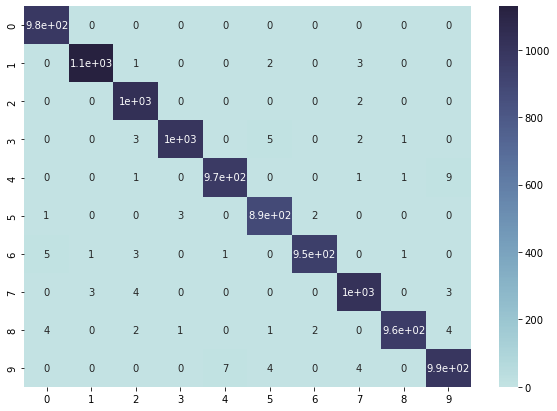

In [27]:
df_cm = pd.DataFrame(confusion_matrix, index = classes, columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=sn.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.show()

### Inception v5 - 6

In [11]:
def inception_v5(initializer = "he_normal"):
    input_layer = keras.Input(shape = (28, 28, 1), name = "input_1")
    
    A1 = tkl.Conv2D(64, kernel_size = (7, 7), strides = (2, 2), padding = "same", activation = "relu", name = "conv_1", kernel_initializer = initializer, bias_initializer = initializer)(input_layer)
    P1 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_1")(A1)
        
    I1 = inception_module(P1, 64, 96, 128, 16, 32, 32, "inception_3a", initializer = initializer)
    I2 = inception_module(I1, 128, 128, 192, 32, 96, 64, "inception_3b", initializer = initializer)
    
    P2 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_2")(I2)
    
    I3 = inception_module(P2, 192, 96, 208, 16, 48, 64, "inception_4a", initializer = initializer)
    I4 = inception_module(I3, 160, 112, 224, 24, 64, 64, "inception_4b", initializer = initializer)
    
    P3 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_3")(I4)
    
    I5 = inception_module(P3, 128, 128, 256, 24, 64, 64, "inception_4c", initializer = initializer)
    I6 = inception_module(I5, 112, 144, 288, 32, 64, 64, "inception_4d", initializer = initializer)
    
    P4 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_4")(I6)
    
    P5 = tkl.GlobalAveragePooling2D(name = "pool_5")(P4)
    
    D1 = tkl.Dropout(0.4)(P5)
    F1 = tkl.Flatten()(D1)
    L1 = tkl.Dense(512, activation = "relu", name = "linear_1", kernel_initializer = initializer, bias_initializer = initializer)(F1)
    output = tkl.Dense(10, activation = "softmax", name = "output", kernel_initializer = initializer, bias_initializer = initializer)(L1)
    
    model = keras.Model(input_layer, output, name = "InceptionV1")
    model.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(),
        optimizer = keras.optimizers.Adam(),
        metrics = ["accuracy"]
    )
    return model

In [12]:
inception_model_v5 = inception_v5()

In [13]:
history_v5 = inception_model_v5.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50)

Epoch 1/50


2022-10-21 17:45:18.723389: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1874/1875 [============================>.] - ETA: 0s - loss: 0.2686 - accuracy: 0.9144

2022-10-21 17:46:19.145743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 66s 33ms/step - loss: 0.2685 - accuracy: 0.9145 - val_loss: 0.0701 - val_accuracy: 0.9808
Epoch 2/50
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0855 - accuracy: 0.9773 - val_loss: 0.0593 - val_accuracy: 0.9843
Epoch 3/50
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0694 - accuracy: 0.9818 - val_loss: 0.0542 - val_accuracy: 0.9846
Epoch 4/50
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0588 - accuracy: 0.9856 - val_loss: 0.0458 - val_accuracy: 0.9863
Epoch 5/50
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0540 - accuracy: 0.9859 - val_loss: 0.0787 - val_accuracy: 0.9813
Epoch 6/50
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0472 - accuracy: 0.9875 - val_loss: 0.0501 - val_accuracy: 0.9876
Epoch 7/50
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0489 - accuracy: 0.9879 - val_loss: 0.0405 - val_accura

In [14]:
predictions = inception_model_v5.predict(X_test)

2022-10-21 18:36:55.432332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 4s 10ms/step


In [15]:
confusion_matrix = tf.math.confusion_matrix(y_test, np.argmax(predictions, axis = 1), 10)

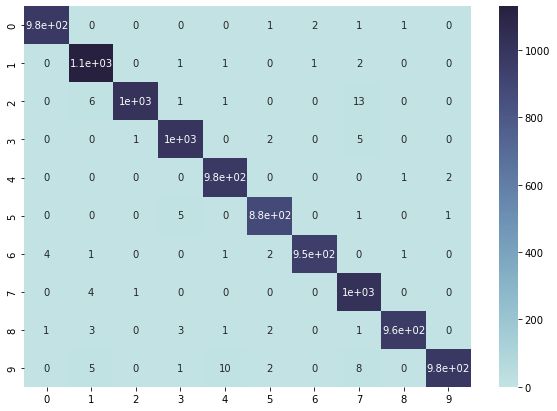

In [16]:
df_cm = pd.DataFrame(confusion_matrix, index = classes, columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=sn.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.show()

### Inception v6 - 9

In [10]:
def inception_v6(initializer = "he_normal"):
    input_layer = keras.Input(shape = (28, 28, 1), name = "input_1")
    
    A1 = tkl.Conv2D(64, kernel_size = (7, 7), strides = (2, 2), padding = "same", activation = "relu", name = "conv_1", kernel_initializer = initializer, bias_initializer = initializer)(input_layer)
    P1 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_1")(A1)
        
    I1 = inception_module(P1, 64, 96, 128, 16, 32, 32, "inception_3a", initializer = initializer)
    I2 = inception_module(I1, 128, 128, 192, 32, 96, 64, "inception_3b", initializer = initializer)
    
    P2 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_2")(I2)
    
    I3 = inception_module(P2, 192, 96, 208, 16, 48, 64, "inception_4a", initializer = initializer)
    I4 = inception_module(I3, 160, 112, 224, 24, 64, 64, "inception_4b", initializer = initializer)
    I5 = inception_module(I4, 128, 128, 256, 24, 64, 64, "inception_4c", initializer = initializer)
    I6 = inception_module(I5, 112, 144, 288, 32, 64, 64, "inception_4d", initializer = initializer)
    I7 = inception_module(I6, 256, 160, 320, 32, 128, 128, "inception_4e", initializer = initializer)
    
    P4 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_3")(I7)
    
    I8 = inception_module(P4, 256, 160, 320, 32, 128, 128, "inception_5a", initializer = initializer)
    I9 = inception_module(I8, 384, 192, 384, 48, 128, 128, "inception_5b", initializer = initializer)
    
    P5 = tkl.GlobalAveragePooling2D(name = "pool_5")(I9)
    
    D1 = tkl.Dropout(0.4)(P5)
    F1 = tkl.Flatten()(D1)
    L1 = tkl.Dense(512, activation = "relu", name = "linear_1", kernel_initializer = initializer, bias_initializer = initializer)(F1)
    output = tkl.Dense(10, activation = "softmax", name = "output", kernel_initializer = initializer, bias_initializer = initializer)(L1)
    
    model = keras.Model(input_layer, output, name = "InceptionV1")
    model.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(),
        optimizer = keras.optimizers.Adam(),
        metrics = ["accuracy"]
    )
    return model

In [11]:
inception_model_v6 = inception_v6()

In [12]:
history_v6 = inception_model_v6.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50)

Epoch 1/50


2022-10-21 18:46:39.214675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - ETA: 0s - loss: 0.3930 - accuracy: 0.8713

2022-10-21 18:47:57.425975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 85s 44ms/step - loss: 0.3930 - accuracy: 0.8713 - val_loss: 0.1045 - val_accuracy: 0.9683
Epoch 2/50
1875/1875 [==============================] - 81s 43ms/step - loss: 0.1084 - accuracy: 0.9722 - val_loss: 0.0881 - val_accuracy: 0.9764
Epoch 3/50
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0816 - accuracy: 0.9789 - val_loss: 0.0657 - val_accuracy: 0.9846
Epoch 4/50
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0730 - accuracy: 0.9815 - val_loss: 0.0460 - val_accuracy: 0.9860
Epoch 5/50
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0620 - accuracy: 0.9844 - val_loss: 0.0630 - val_accuracy: 0.9817
Epoch 6/50
1875/1875 [==============================] - 78s 41ms/step - loss: 0.0531 - accuracy: 0.9864 - val_loss: 0.0423 - val_accuracy: 0.9880
Epoch 7/50
1875/1875 [==============================] - 78s 41ms/step - loss: 0.0515 - accuracy: 0.9866 - val_loss: 0.0609 - val_accura

In [14]:
predictions = inception_model_v6.predict(X_test)

2022-10-21 20:03:15.497372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 5s 14ms/step


In [15]:
confusion_matrix = tf.math.confusion_matrix(y_test, np.argmax(predictions, axis = 1), 10)

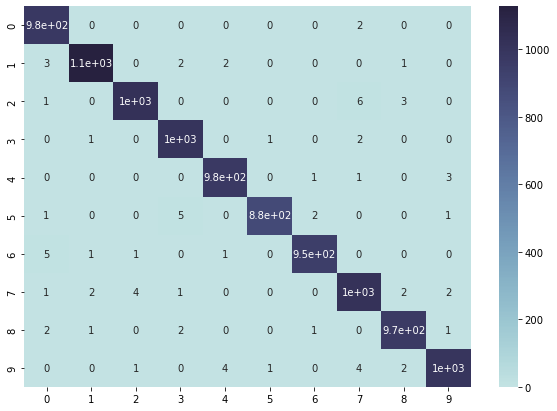

In [16]:
df_cm = pd.DataFrame(confusion_matrix, index = classes, columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=sn.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.show()